In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor
import lightgbm as lgb
import joblib

In [23]:
df = pd.read_csv('perox_final.csv')
with open('features_perox.txt', 'r') as file:
    features = [feat.replace('\n', '') for feat in file]

Km_df = df[features]
Km_df['Km'] = df['Km']
Km_target = np.log10(Km_df['Km'])
Km_features = Km_df.drop(['Km'], axis = 1)
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(Km_features)
Km_features = pd.DataFrame(df_filled, columns=Km_features.columns)

C:\Users\julia\AppData\Local\Temp\ipykernel_34992\2887385657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Km_df['Km'] = df['Km']


In [24]:
scaler = joblib.load('Km_scaler_stack_perox.pkl')
stack = joblib.load('Km_model_stack_perox.pkl')

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
random_st = 20
size_of_test=0.2

X_train, X_test, y_train, y_test = train_test_split(Km_features, Km_target, test_size = size_of_test, random_state = random_st)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)
stack.fit(x_train, y_train).score(x_test, y_test)
y_pred = stack.predict(x_test)
print("R2__score")
print(r2_score(y_test, y_pred))
print("MAE")
print(mean_absolute_error(y_test, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1805
[LightGBM] [Info] Number of data points in the train set: 773, number of used features: 37
[LightGBM] [Info] Start training from score 0.023218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


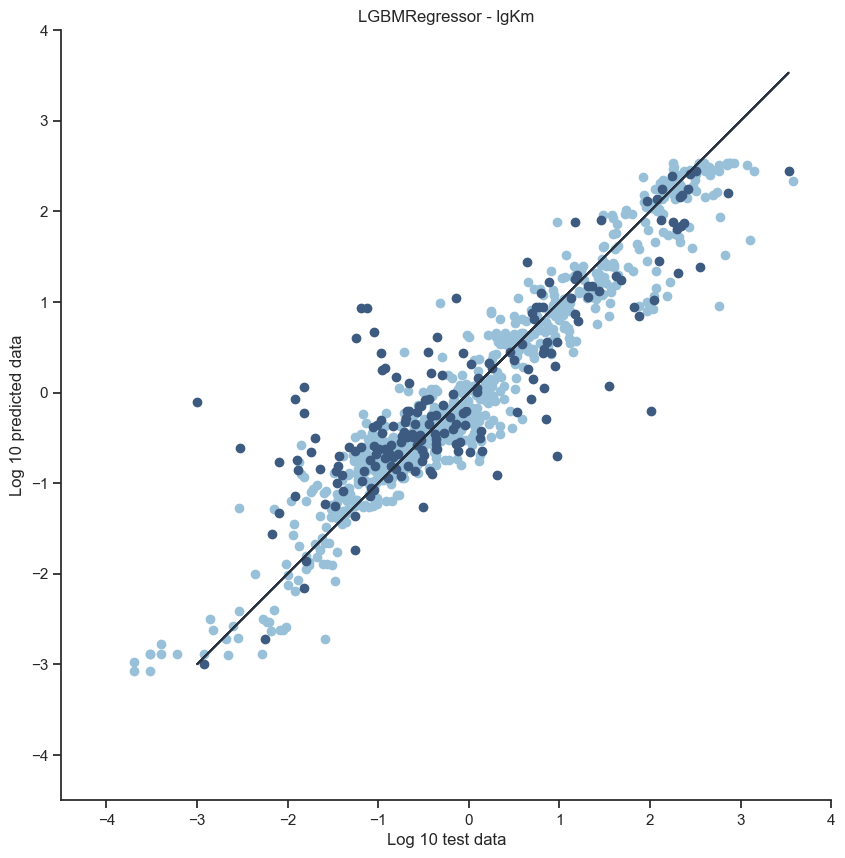

In [13]:
y1_pred = stack.predict(x_train)
import matplotlib.pylab as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#98c1d9')
plt.scatter(y_test, y_pred, color='#3d5a80')
plt.plot(y_test, y_test, color='#293241')
plt.title('LGBMRegressor - lgKm')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')
plt.xlim(-4.5, 4)
plt.ylim(-4.5, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('Km_stack_milti.png', transparent=True, dpi=1200)
plt.show()